# Проверка непараметрических гипотез

## Библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.descriptivestats import sign_test

import seaborn as sns
from permutation_test import permutationtest

# перестановочный критерий
from permute.core import one_sample, two_sample

# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# для перестановок
import itertools

# бутстрап
from arch.bootstrap import IIDBootstrap

## Мышки с зеркалами

#### Данные

Значения — вероятность, что данная мышка находится в комнате в зеркалом

In [3]:
data_pd = pd.read_csv('data/mirror_mice.txt', sep='\t', header=None)
data = data_pd.values.reshape(-1)

data_pd.sample(10)

,0
14,0.467365
4,0.400444
5,0.426292
15,0.467330
7,0.477977
12,0.481614
9,0.476602
1,0.640620
6,0.417156
10,0.488677


In [4]:
data_pd.describe()

,0
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


#### Гистограмма распределения

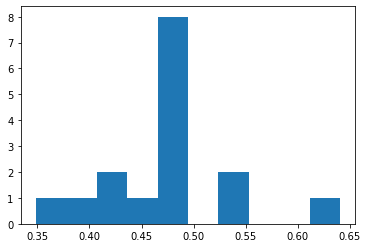

In [9]:
plt.hist(data)
plt.show()

#### Биномиальный тест: ```st.binom_test```

Бинаризируем данные:
 - np.sum(data>0.5) — мышки, находящиеся в комнате с зеркалом
 
Проверяем гипотезу, что большинство мышей находится в комнате с зеркалом

In [6]:
st.binom_test(np.sum(data>0.5), data.shape[0])

0.021270751953125

#### Критерий знаков

Проверяет гипотезу о том, что у выборки конкретная медиана
Статистика: кол-во чисел $x_i$ - $m_0$ > 0

In [10]:
sign_test(data, mu0=0.5)

(-5.0, 0.021270751953125)

#### Перестановочный критерий:
$H_0: \mathsf{E}X = m_0$

$H_1: \mathsf{E}X <\not=> m_0$

$T = \sum_i (X_i-m_0)$

In [16]:
t = (data - 0.5)
T = np.sum(t)
T

-0.3953776999999997

In [11]:
list(itertools.combinations(range(16), 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 

In [14]:
list(itertools.product([-1, 1], repeat=2))

[(-1, -1), (-1, 1), (1, -1), (1, 1)]

In [17]:
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=len(t)):
    count +=1
    # значение статистики
    stat = np.dot(t, v)
    # модуль, так как используем двустороннюю гипотезу
    if abs(stat)>=abs(T):
        good+=1
    
        
good/count

0.15777587890625

##### Библиотека

Перестановочный критерий:

In [20]:
one_sample(data-0.5, alternative='two-sided')

(0.15661843381566176, -0.024711106249999983)

In [21]:
one_sample(data, 0.5*np.ones_like(data), alternative='two-sided')

(0.15765842341576586, -0.024711106249999983)

#### Бутстрап

Нужен для построения доверительного интервала

#### Вручную

In [29]:
rs = np.random.RandomState(0)

# Генерация 1000 выборок размера len(data)
# out: индексы объектов из изначальной выборки
idx = rs.randint(low=0, high=16, size=(1000, len(data)))
# Массив для средних выборок
results = []

for i in idx:
    sample = data[i]
    # Работаем со средними значениями
    results.append(sample.mean())

# Подсчет доверительного интервала для среднего
np.percentile(results, [2.5, 97.5])

# Подсчет доверительного интервала для медиан: заменяем np.mean() на np.median()

array([0.44498474, 0.50910533])

#### Библиотека

In [38]:
bs = IIDBootstrap(data)
bs.conf_int(np.mean, 1000, method='basic')
# Аналогично: IIDBootstrap(data).conf_int(np.mean, 1000, method='basic')

array([[0.4438768 ],
       [0.50445144]])

## Терапия при анорексии
**Everitt N., McMahon M. (2004). Nutrition and the surgical patient. In Consensus in Clinical Nutrition, Cambridge: Cambridge University Press.**

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

**Выборки связные**

#### Данные

In [48]:
data = pd.read_csv('data/weight.txt', sep='\t')
value = data.values

data.sample(5)

,Before,After
11,89.2,95.3
18,87.7,89.1
12,81.3,82.4
3,82.6,81.9
13,76.5,72.5


### Ввизуализация данных

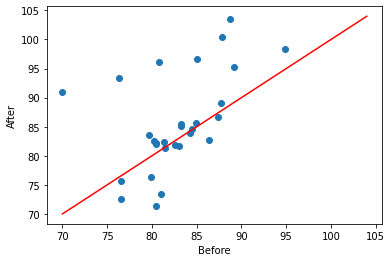

In [49]:
plt.scatter(value[:,0], value[:,1])
plt.xlabel('Before')
plt.ylabel('After')

# график для проверки данные на "адекватность" — предварительный анализ данных
plt.plot(np.arange(70, 105), np.arange(70, 105), color='red')

plt.show()

### Проверка на нормальность

#### QQ-plot

Критерий Фишера — проверить на нрмальность (критерий Шапиро)

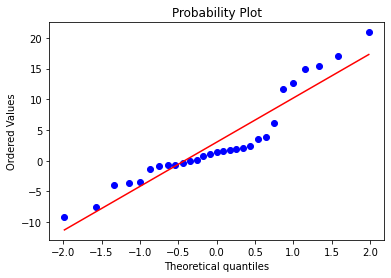

In [50]:
st.probplot(value[:,1] - value[:,0], plot=plt)
plt.show()

#### Шапиро (```st.shapiro```)

Проверка на нормальность данных

In [54]:
st.shapiro(w[:,1] - w[:,0])[1]

0.007945157587528229

$p-value$ близко к нулю $\rightarrow$ нулевая гипотеза о принадлежности данных к нормальному распределению отвергается!

#### Критерий знаков (```sign_test```)

Если бы предыдущий критерий показал, что данные нормальные, то можно было бы воспользоваться параметрическими критериями: $z-test$ или $t-test$.

Но это не так, значит использую либо критерий знаков, либо перестановочный критерий.

In [55]:
# Проверка на равенство нулю медианы
sign_test(w[:,1] - w[:,0])[1]

0.26493089646101

Нулевая гипотеза о том, что медиана равна нулю, не отвергается.

#### Уилкоксон (```st.wilcoxon```):

Критерий знаковых рангов (снова проверяем на равенство нулю медианы).

**Минус**: предположение о симметричности выборки относительно медианы. Нулевое распределение — считаем всевозможные перестановки рангов (очен накладно).

In [58]:
st.wilcoxon(w[:,1] - w[:,0])[1]

0.06291972262602667

#### Перестановочный критерий (```one_sample```):

Равность матожидания нулю

In [60]:
one_sample(w[:,1] - w[:,0],  alternative='two-sided')

(0.033659663403365965, 3.006896551724138)

#### Доверительный интервал для среднего прироста веса с помощью бутстрепа:

In [61]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.mean, 1000, method='bca'))

[[0.52124105]
 [5.71376835]]


С вероятностью 95% терапия помогает (прирост больше нуля).

#### Доверительный интервал для медианы прироста веса:

In [62]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.median, 1000, method='bca'))

[[-0.7]
 [ 2.1]]


**Вывод**: аномальные выбросы компенсировали значения и показали нереальной подтверждение гипотезы. Медиана же не обратила внимания на размер этих аномалий и отвергла нулевую гипотезу.

## Недвижимость в Сиэттле
**Hesterberg T., Monaghan S., Moore D.S., Clipson A., Epstein R. (2005). Bootstrap methods and permutation tests. In Introduction to the Practice of Statistics, New York: W. H. Freeman and Company.** http://statweb.stanford.edu/~tibs/stat315a/Supplements/bootstrap.pdf

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли цены?

#### Данные

In [64]:
data = pd.read_csv('data/seattle.txt', delimiter='\t')
data.sample(5)

,Price,Year
13,260.000,2002
8,222.000,2002
44,375.000,2002
47,330.000,2002
51,55.268,2001


#### Boxplot

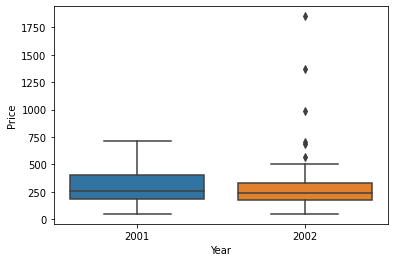

In [65]:
sns.boxplot(data = data, y = 'Price', x = 'Year')
plt.show()

In [66]:
x1 = data.loc[data['Year']==2001]['Price'].values
x2 = data.loc[data['Year']==2002]['Price'].values

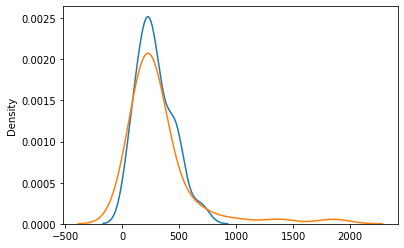

In [67]:
sns.kdeplot(x1, label='2001')
sns.kdeplot(x2, label='2002')
plt.show()

#### QQ-график

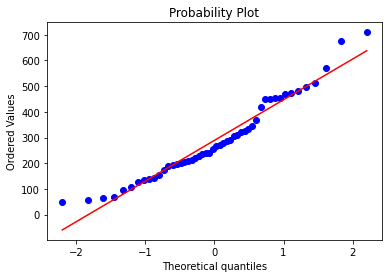

In [68]:
st.probplot(x1, plot = plt)
plt.show()

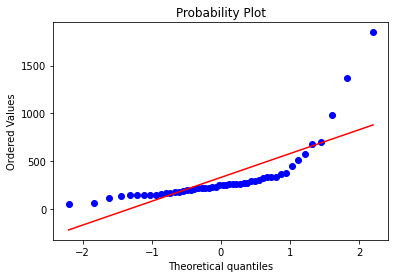

In [69]:
st.probplot(x2, plot = plt)
plt.show()

#### Критерий Стьюдента:

Его использовать не стоит, так как у $x_2$ все плохо с нормальностью.

In [70]:
st.ttest_ind(x1, x2)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42235167114691463)

#### Критерий Манна-Уитни-Уилкоксона:

Равенство функций распределений.

In [72]:
st.mannwhitneyu(x1, x2, alternative= 'two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

Нулевая гипотеза о том, что они равны, опровергнута быть не может.

#### Перестановочный критерий:

$one-sample$ нельзя использовать, так как она для связных выборок.

In [75]:
two_sample(x1, x2,  alternative='two-sided')

(0.4419755802441976, -40.33059999999995)

#### Доверительные интервалы для средних значений в выборках с помощью бутстрепа:

Ожидаемые ответы ```[246, 330], [241,403]```

In [78]:
bs = IIDBootstrap(x1)
print(bs.conf_int(np.mean, 1000, method='basic'))
bs = IIDBootstrap(x2)
print(bs.conf_int(np.mean, 1000, method='basic'))

[[243.2955255]
 [330.311352 ]]
[[235.242207]
 [406.60101 ]]


#### Доверительный интервал для разности двух средних с помощью бутстрепа:

Ожидаемые ответы: ```[-52, 115]```

In [82]:
bs = IIDBootstrap(x2 - x1)
print(bs.conf_int(np.mean, 1000, method='basic'))

[[-48.5766575]
 [116.704421 ]]


#### Статистика Колмогорова-Смирнова

Равенство ф-ций распределений.

In [84]:
st.ks_2samp(x1, x2)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

## Алюминий в тополях
**Laureysens I., Blust R., De Temmerman L., Lemmens C., Ceulemans R. (2004). Clonal variation in heavy metal accumulation and biomass production in a poplar coppice culture. I. Seasonal variation in leaf, wood and bark concentrations. Environmental Pollution, 131, 485-494.**

Для 13 разновидностей тополей, растущих в зоне интенсивного загрязнения, в
августе и ноябре измерялась средняя концентрация алюминия в микрограммах на
грамм древесины.

In [88]:
al = pd.read_csv('data/poplar.txt', delimiter='\t')
al.sample(5)

,Clone,August,November
8,Beaupre,10.0,16.3
3,Primo,12.6,12.7
7,Gibecq,8.9,14.2
4,Raspalje,9.5,10.5
11,Gaver,8.1,20.4


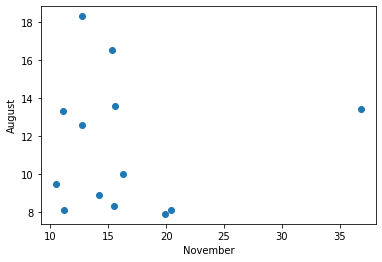

In [89]:
plt.scatter(al['November'].values, al['August'].values)
plt.xlabel('November')
plt.ylabel('August')
plt.show()

In [90]:
delta = al['August']-al['November']

#### QQ график

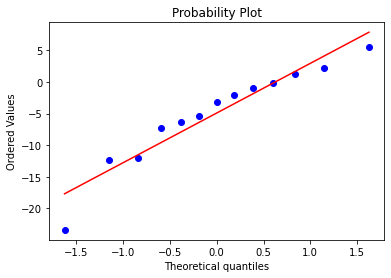

In [92]:
st.probplot(delta, plot=plt)
plt.show()

In [93]:
st.shapiro(delta)

ShapiroResult(statistic=0.9266654849052429, pvalue=0.308051198720932)

#### Критерий знаков

Медиана равна нулю. 

In [94]:
sign_test(delta)

(-3.5, 0.09228515625000003)

#### Критерий знаковых рангов Уилкоксона

In [95]:
st.wilcoxon(delta)

WilcoxonResult(statistic=16.0, pvalue=0.039794921875)

#### Перестановочный критерий

In [96]:
one_sample(al['November'], al['August'],  alternative='two-sided')

(0.02943970560294397, 4.8999999999999995)

#### Поменяем статистику (вместо ```mean``` поставим ```t```)

Ожидаемый ответ: ```0.03```

In [97]:
one_sample(al['November'], al['August'],  alternative='two-sided', stat='t')

(0.029199708002919968, 2.3088956550760438)

#### Доверительный интервал для средней разности с помощью бутстрепа

In [98]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='basic')

array([[-8.65403846],
       [-0.63038462]])

#### Доверительный интервал методом 'bca'

In [99]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='bca')

array([[-10.0623164 ],
       [ -1.69297903]])

#### Зависимость устойчивости доверительного интервала от количества попыток сэмплирования (проверить для n<20000)

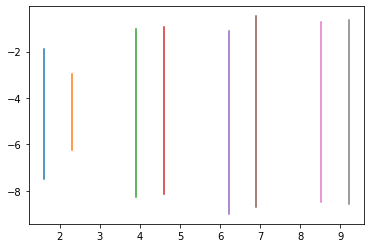

In [100]:
for id, i in enumerate([5,10,50,100,500,1000, 5000, 10000]):
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, i, method='basic')
    plt.plot([np.log(i), np.log(i)], ci )

[[-6.29645838]
 [-3.88790372]]
[[-7.28546345]
 [-1.75592951]]
[[-10.09056708]
 [ -2.35137979]]
[[-9.26607842]
 [-1.25920909]]
[[-10.21029921]
 [ -1.69455264]]
[[-9.62918848]
 [-1.69670355]]
[[-9.64640578]
 [-1.56923077]]
[[-9.97692308]
 [-1.61538462]]
[[-9.9       ]
 [-1.66153846]]


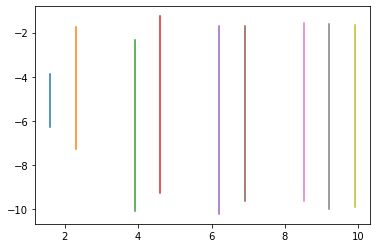

In [101]:
for id, i in enumerate([5,10,50,100,500,1000, 5000, 10000, 20000]):
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, i, method='bca')
    plt.plot([np.log(i), np.log(i)], ci)
    print(ci)

#### Зависимость доверительного интервала от уровня доверия

[[-5.23076923]
 [-4.74615385]]
[[-5.52307692]
 [-4.50769231]]
[[-5.81538462]
 [-4.24615385]]
[[-6.46923077]
 [-3.69230769]]
[[-7.33076923]
 [-3.00769231]]
[[-7.77692308]
 [-2.56923077]]
[[-8.90769231]
 [-2.07692308]]
[[-9.95821078]
 [-1.56923077]]
[[-11.72155256]
 [ -0.74615385]]


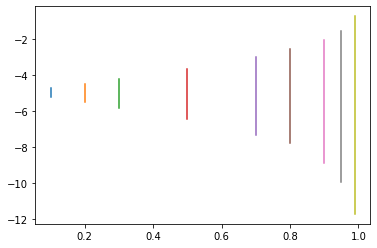

In [102]:
for p in [0.1, 0.2, 0.3,0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, 5000,size=p, method='bca')
    plt.plot([p, p], ci )
    print (ci)

## Время ремонта телекоммуникаций

Verizon is the primary local telephone company (the legal term is Incumbent Local Exchange Carrier, ILEC) for a large area in the eastern United States. As such, it is responsible for providing repair service for the customers of other telephone companies (known as Competing Local Exchange Carriers, CLECs) in this region. Verizon is subject to fines if the repair times (the time it takes to fix a problem) for CLEC customers are substantially worse than those for Verizon’s own customers. This is determined using hypothesis tests, negotiated with the local Public Utilities Commission (PUC).

#### Данные

In [116]:
data = pd.read_csv('data/verizon.txt', delimiter='\t')
data.sample(20)

,Time,Group
911,3.83,ILEC
19,0.00,ILEC
302,23.25,ILEC
449,0.00,ILEC
49,46.95,ILEC
968,3.22,ILEC
1663,18.13,ILEC
58,74.05,ILEC
801,4.77,ILEC
1185,1.20,ILEC


#### Boxplot

<AxesSubplot:xlabel='Time', ylabel='Group'>

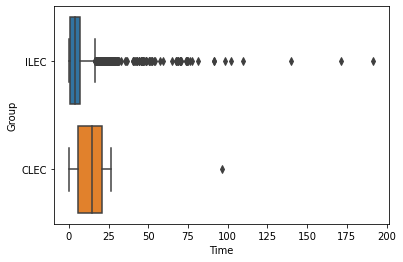

In [117]:
sns.boxplot(data=data,x='Time', y='Group')

In [118]:
x1 = data.loc[data['Group']=='ILEC']['Time'].values
x2 = data.loc[data['Group']=='CLEC']['Time'].values
x1.shape, x2.shape

((1664,), (23,))

Как видим, выборки не равномощны.

#### Гистограмма

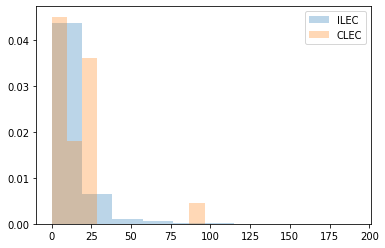

In [119]:
plt.hist(x1, bins=10, density=True, alpha=0.3, label='ILEC')
plt.hist(x2, bins=10, density=True, alpha=0.3, label='CLEC')
plt.legend(loc='best')
plt.show()

#### QQ-plot

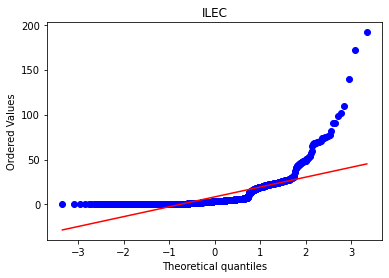

In [120]:
st.probplot(x1, plot=plt)
plt.title('ILEC')
plt.show()

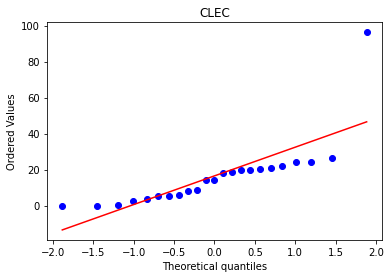

In [121]:
st.probplot(x2, plot=plt)
plt.title('CLEC')
plt.show()

Выборки распределены не нормально, следовательно, нельзя воспользоваться $t-test$.

#### Критерий Мана-Уитни-Уилкоксона

In [122]:
st.mannwhitneyu(x1,x2, alternative='two-sided')

MannwhitneyuResult(statistic=11452.0, pvalue=0.0009130276886676177)

#### Перестановочный критерий

In [123]:
two_sample(x1,x2,  reps=1000, alternative='two-sided')

(0.03796203796203801, -8.097519857859533)

#### Критерий Колмогора-Смирнова

In [124]:
st.ks_2samp(x1,x2)

KstestResult(statistic=0.45147888795986624, pvalue=9.726002165011405e-05)